### Simulating marginal and conditional PMFs

In this example we will simulate the marginal and conditional PMFs for a given discrete distribution. 
First we create arrays that contain the range for data points in each component.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

x_points=np.arange(-2,2.1,1)
y_points=np.arange(-2,2.1,1)

print('x:',x_points)

x: [-2. -1.  0.  1.  2.]


First, we create an array with each row being a unique (x,y) pair. As we're going to randomly choose from this points, no repetitions are allowed. 

In [2]:
points=np.array([]).reshape(0,2)

for i in x_points:
    y=np.arange(-2+abs(i),2-abs(i)+0.1,1)
    x = np.array([i] * y.shape[0]) 
    #makes copies of the same x for each y
    #for example, if y=-1, x=[-1 0 1]
    
    pairs=np.concatenate(([x], [y]), axis=0).T
    points=np.concatenate((points,pairs), axis=0)
    #creates the x,y pairs for a given x and adds to the points array
    
print('All possible points for this distribution: \n',points)

All possible points for this distribution: 
 [[-2.  0.]
 [-1. -1.]
 [-1.  0.]
 [-1.  1.]
 [ 0. -2.]
 [ 0. -1.]
 [ 0.  0.]
 [ 0.  1.]
 [ 0.  2.]
 [ 1. -1.]
 [ 1.  0.]
 [ 1.  1.]
 [ 2.  0.]]


#### Plotting the points

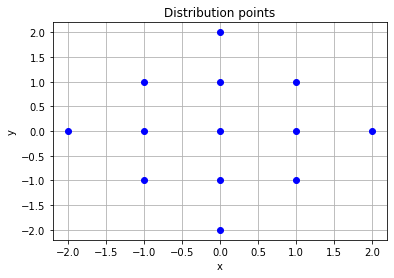

In [3]:
plt.plot(points[:,0],points[:,1],'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribution points')
plt.grid(True)

As the distribution is uniform on these points, the probability of each points:

In [5]:
p=1/points.shape[0]
print('p=',p, 'theoretical:',1/13)

p= 0.07692307692307693 theoretical: 0.07692307692307693


To choose a random point from these, we shuffle the rows of the points array and choose the first row.

In [10]:
np.random.shuffle(points)
print(points[:1,:])

[[0. 1.]]


We repeat this random selection many times and create an array of all outputs.

In [12]:
trials = 100000

random_draws=np.array([]).reshape(0,2)

for i in range(trials):
    np.random.shuffle(points)
    random_draws=np.concatenate((random_draws,points[:1,:]), axis=0)
    
#print(random_draws)

Having this array with the random selections, we can now find the PMFs we are interested in. The P_x(-1) for example is the number of rows for which x=-1 divided by the trials.

In [13]:
#marginal PMF for X=-1
#random_draws[random_draws[:,0]==-1].shape[0]

PX_m1=random_draws[random_draws[:,0]==-1].shape[0]/trials
print('example: PX(-1)=',PX_m1, 'theoretical:', 3/13) 

example: PX(-1)= 0.23161 theoretical: 0.23076923076923078


#### Repeating this for all X we find the marginal PMF of X and plot it. 

We then repeat the same for Y.

In [14]:
PMF_X=np.zeros(x_points.shape[0])
for i in range(x_points.shape[0]):
    PMF_X[i]=random_draws[random_draws[:,0]==x_points[i]].shape[0]/trials

print('P[x]=',PMF_X)

P[x]= [0.07546 0.23161 0.38494 0.23123 0.07676]


Text(0.5, 1.0, 'Marginal PMF of X')

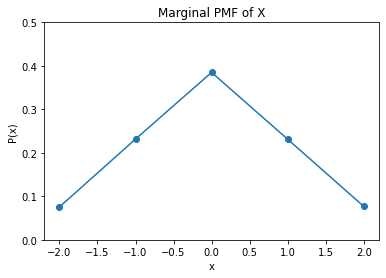

In [17]:
plt.plot(x_points,PMF_X,'-o')
plt.ylim(0,0.5)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Marginal PMF of X')

In [18]:
print(np.sum(PMF_X))

1.0


In [19]:
PMF_Y=np.zeros(y_points.shape[0])
for i in range(y_points.shape[0]):
    PMF_Y[i]=random_draws[random_draws[:,1]==y_points[i]].shape[0]/trials

print('P[y]=',PMF_Y)

P[y]= [0.07668 0.23113 0.38294 0.23224 0.07701]


Text(0.5, 1.0, 'Marginal PMF of Y')

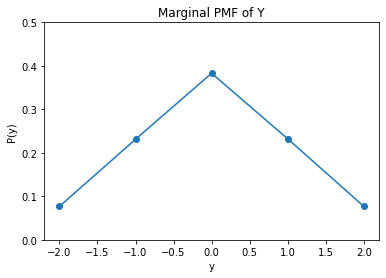

In [20]:
plt.plot(y_points,PMF_Y,'-o')
plt.ylim(0,0.5)
plt.xlabel('y')
plt.ylabel('P(y)')
plt.title('Marginal PMF of Y')

#### Similarly, we find the conditional probabilities by only counting the rows that satisfy the condition.

In [21]:
#conditional PMF of X given Y=1
PMF_X_cond_Y_ii=np.zeros(x_points.shape[0])
cond_random_draws=random_draws[random_draws[:,1]==1]
#only keep the random draws with y==1

for i in range(x_points.shape[0]):
    PMF_X_cond_Y_ii[i]=cond_random_draws[cond_random_draws[:,0]==x_points[i]].shape[0]/cond_random_draws.shape[0]

print('P[x|y=1]=',PMF_X_cond_Y_ii)

P[x|y=1]= [0.         0.33219945 0.33306063 0.33473992 0.        ]


Text(0.5, 1.0, 'Conditional PMF of X given Y=1')

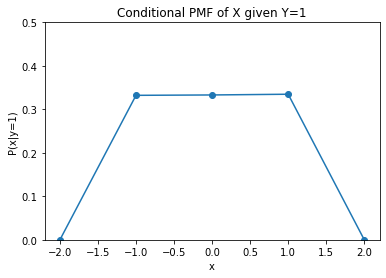

In [22]:
plt.plot(x_points,PMF_X_cond_Y_ii,'-o')
plt.ylim(0,0.5)
plt.xlabel('x')
plt.ylabel('P(x|y=1)')
plt.title('Conditional PMF of X given Y=1')

In [24]:
PMF_X_cond_Y_iv=np.zeros(x_points.shape[0])
cond_random_draws=random_draws[np.all([
    random_draws[:,1]>-1,random_draws[:,1]<2], axis=0)]
for i in range(x_points.shape[0]):
    PMF_X_cond_Y_iv[i]=cond_random_draws[cond_random_draws[:,0]==x_points[i]].shape[0]/cond_random_draws.shape[0]

print('P[x|-1<y<2]=',PMF_X_cond_Y_iv)

P[x|-1<y<2]= [0.12266329 0.24943919 0.25135733 0.25176371 0.12477649]


Text(0.5, 1.0, 'Conditional PMF of X given -1<Y<2')

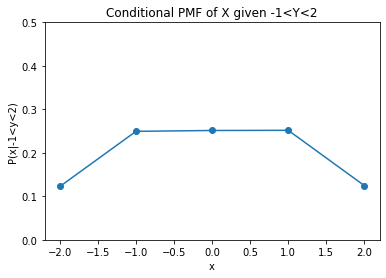

In [25]:
plt.plot(x_points,PMF_X_cond_Y_iv,'-o')
plt.ylim(0,0.5)
plt.xlabel('x')
plt.ylabel('P(x|-1<y<2)')
plt.title('Conditional PMF of X given -1<Y<2')

In [26]:
print('E[x|-1<Y<2]=',np.mean(PMF_X_cond_Y_iv*x_points))

E[x|-1<Y<2]= 0.0013101856367242037
